# K-Means算法

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import random
np.random.seed(250)

In [4]:
X, y = make_blobs(centers=4, n_samples=1000)
print("dataset shape is{}".format(X.shape))

dataset shape is(1000, 2)


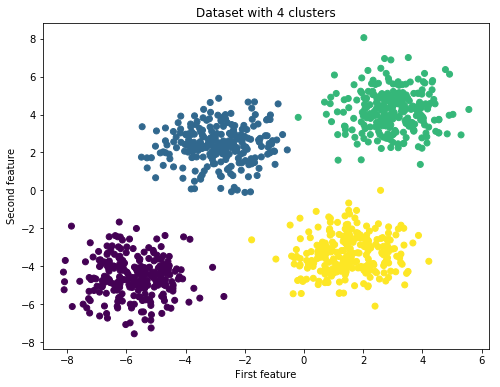

In [5]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [25]:
class Kmeans:
    def __init__(self, n_clusters=4):
        self.k = n_clusters
    
    def distence(self, point):
        dis = np.sqrt(np.sum((self.centers - point)**2, axis=1))
        return dis
    
    #计算距给顶点最近的聚类中心点，返回中心点的位置
    def classify(self, point):
        dis = self.distence(point)
        return np.argmin(dis)
    
    def fit(self, data):
        n_samples, n_features = data.shape
        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)
        
        old_flags = None
        iters = 0
        
        while True:
            new_flags = [self.classify(point) for point in data]
            
            if new_flags == old_flags:
                print("Training finished after {} iterations!".format(iters))
                return
            
            old_flags = new_flags
            iters += 1
            
            for id_ in range(self.k):
                points_idx = np.where(np.array(new_flags) == id_)
                points = data[points_idx]
                self.centers[id_] = points.mean(axis=0)
                
    def plot_clusters(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=y)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='k')
        plt.show()
        

初始化并调整模型

In [26]:
kmeans = Kmeans(n_clusters=4)
kmeans.fit(X)

Training finished after 15 iterations!


描述初始的和最终的聚类中心

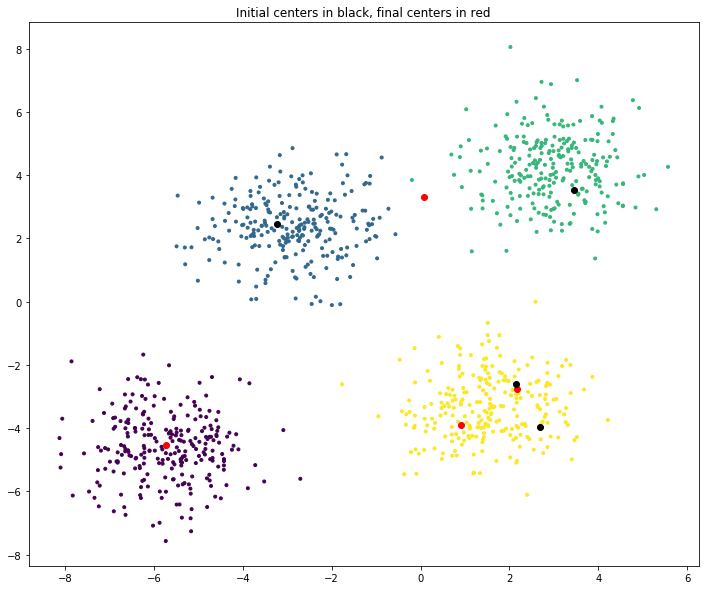

In [27]:
kmeans.plot_clusters(X)